# <center>Effect of Target Transformation on Abalone Age Prediction Using Regression Model</center>

#### <center> Dimas Buntarto </center>

## Introduction

Regression is one method to determine the causal relationship between variables with other variables. In simple regression analysis, the relationship between variables is linear, where changes in the variable X will be followed by changes in the variable permanently.

Regression is an analytical method commonly used to see the effect between two or many variables. Generally, regression analysis is used to make predictions or forecasts. Meanwhile, the relationship between these variables is functional which is realized in a mathematical model.

The variable whose value is predicted is called the target. In regression, the target has a continuous value.

In the real world, sometimes found targets that are not normally distributed. This sometimes affects the model’s performance on the data.

Before doing the analysis, sometimes the target is transformed first, so that the distribution is close to normal.

This paper will try to determine the effect of target transformation on the analysis using regression models. The data we will use is the abalone dataset.

## Objective

- Knowing the effect of target transformation on the regression method used to predict the age of abalone. 

## Methods

1. Getting dataset from website http://archive.ics.uci.edu/ml/datasets/Abalone.
2. Checking the dataset.
3. Doing *Exploratory Data Analysis* to the dataset. 
4. Doing feature enginering to the dataset.
5. Comparing regression models with and without target transformation.

The regression models that we will use are:
1. Linear Regression
2. K Nearest Neighbors
3. Decision Tree
4. Support Vector Machine

As for the target transformation, we will use the `np.sqrt` 

## About The Dataset

The dataset is retrieved from http://archive.ics.uci.edu/ml/datasets/Abalone. Given is the at-tribute name, attribute type, the measurement unit and a brief description.

|Name|Data Types|Meas.|Description|
|----|----------|-----|-----------|
|Sex |Nominal   |-    |M, F, and I (infant)|
|Length|Continuous|  mm|   Longest shell measurement|
|Diameter|Continuous|  mm|   Perpendicular to length|
|Height|Continuous  |mm   |With meat in shell
|Whole weight|Continuous  |grams  |Whole abalone|
|Shucked weight  |Continuous  |grams  |Weight of meat|
|Viscera weight  |Continuous  |grams  |Gut weight (after bleeding)|
|Shell weight    |Continuous  |grams  |After being dried|
|Rings|Integer|-|+1.5 gives the age in years|

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import mean_squared_error

print('Libraries has been imported')

Libraries has been imported


## Getting The Dataset

We get the dataset first. We get the abalone dataset through the site http://archive.ics.uci.edu/ml/datasets/Abalone

In [2]:
kol = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight',
       'Viscera weight', 'Shell weight','Rings']

data = pd.read_csv('abalone.data', sep=',', names=kol)

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


From the table above we can see that the data has 4,177 samples with 9 features.

## Checking The Dataset

We first check the condition of the data which includes the types of features and data descriptions.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


All features are float and integer except for the `Sex` feature. From the information above, we can find out that there are no missing values in the data.

We look at the description of the data to ensure that the data is informed.

In [4]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Information on the data states that there are no missing values in the data. However, if you look at the data description, there is a value of 0 in the height measurement (the `Height` column). This 0 value is probably a measurement error in the data so we have to deal with it first.

### Handling measurement error

The data in the `Height` column may have measurement errors. We first check the position and number of the 0 values.

In [5]:
(data.Height == 0).sum()

2

In [6]:
data[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


There are 2 samples that are estimated to have measurement errors in the `Height` column. The two empty values are in the infant gender (I).

Since there are only 2 samples, we can omit the two values. It's just that in this paper we will replace it with the average value for the sex of Infant (I).

In [7]:
mean = pd.pivot_table(data, index=['Sex'], aggfunc={'Height':np.mean})
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [8]:
data['Height']=data['Height'].replace(to_replace=0, value=0.0107996)

In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139522,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041810,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can see that there are no empty values in the dataset.

## Splitting the Dataset

Before we separate the data into train data and test data, we will first determine the age of the abalone. The age of abalone is obtained by adding the number of rings by 1.5.

In [10]:
data['Age'] = data['Rings'] + 1.5

# remove Rings coloumn
data = data.drop('Rings', axis=1)

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


The age of abalone has been determined.

Next, we will separate the data into groups of train data and test data. We will determine the size of the test data as much as 30% of the dataset 

In [11]:
train, test = train_test_split(data, test_size=0.30, random_state=42)

print('Train data points:', len(train))
print('Test data points:', len(test))

Train data points: 2923
Test data points: 1254


To make it easier for the next step, we will separate the existing variables 

In [12]:
numeric_features = ['Length','Diameter','Height','Whole weight','Shucked weight',
                    'Viscera weight',
                 'Shell weight']

categoric_feature = 'Sex'

features = numeric_features + [categoric_feature]

target = 'Age'

## Exploratory Data Analysis

### `Sex` Feature

Let's start analyzing data train. We start by looking at the gender condition (the `Sex` column). Because the type of data on gender is categorical data, we will analyze it using a pie chart.

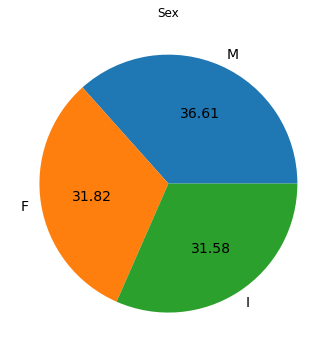

In [13]:
jk = train[categoric_feature].value_counts(normalize=True)
jk.plot(kind='pie',
      figsize=(5,5),
      title=categoric_feature,
      ylabel="",
      autopct='%.2f',
      fontsize=14)

plt.tight_layout()
plt.show()

If we look, the sex distribution is quite balanced, which is about 30 percent for each gender.

We will still use this categorical feature in later modeling.

We will use one-hot encoding for further processing of this categorical feature. 

### Numerical Features

Next, let's look at the distribution of the numerical features.

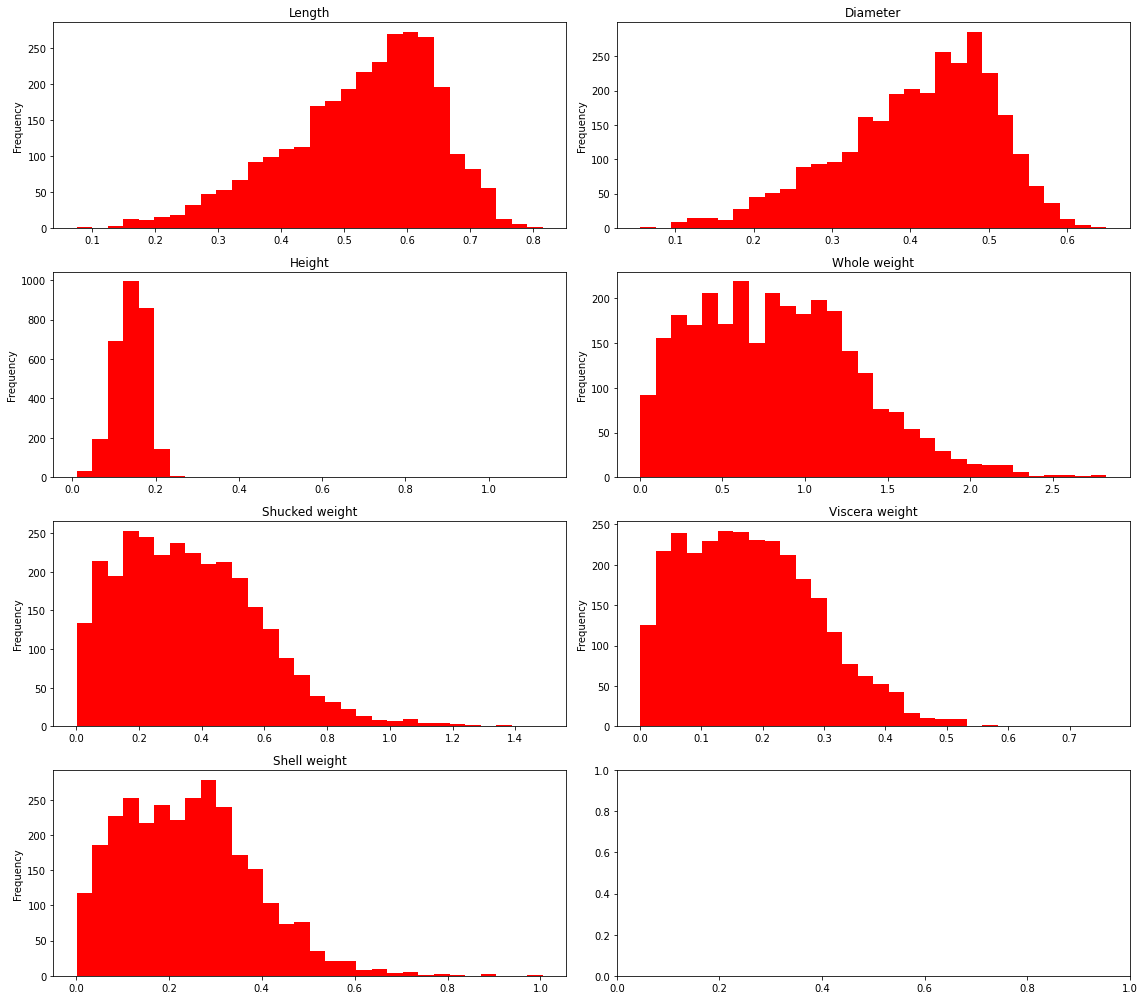

In [14]:
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numeric_features):
    hist = train[c].plot(kind='hist', ax=axes[i], title=c, color='red', bins=30)
    
plt.tight_layout()
plt.show()

From the graph above, we can see that the numerical features are not normally distributed, except for the `Height` feature which looks slightly normally distributed. The `Length` and `Diameter` features have values that are distributed to the right of the curve, which means that their skewness is negative. The other features have a value distribution that is on the left of the curve, which means the skewness is positive.

Let's see if there is an outlier in this numeric feature

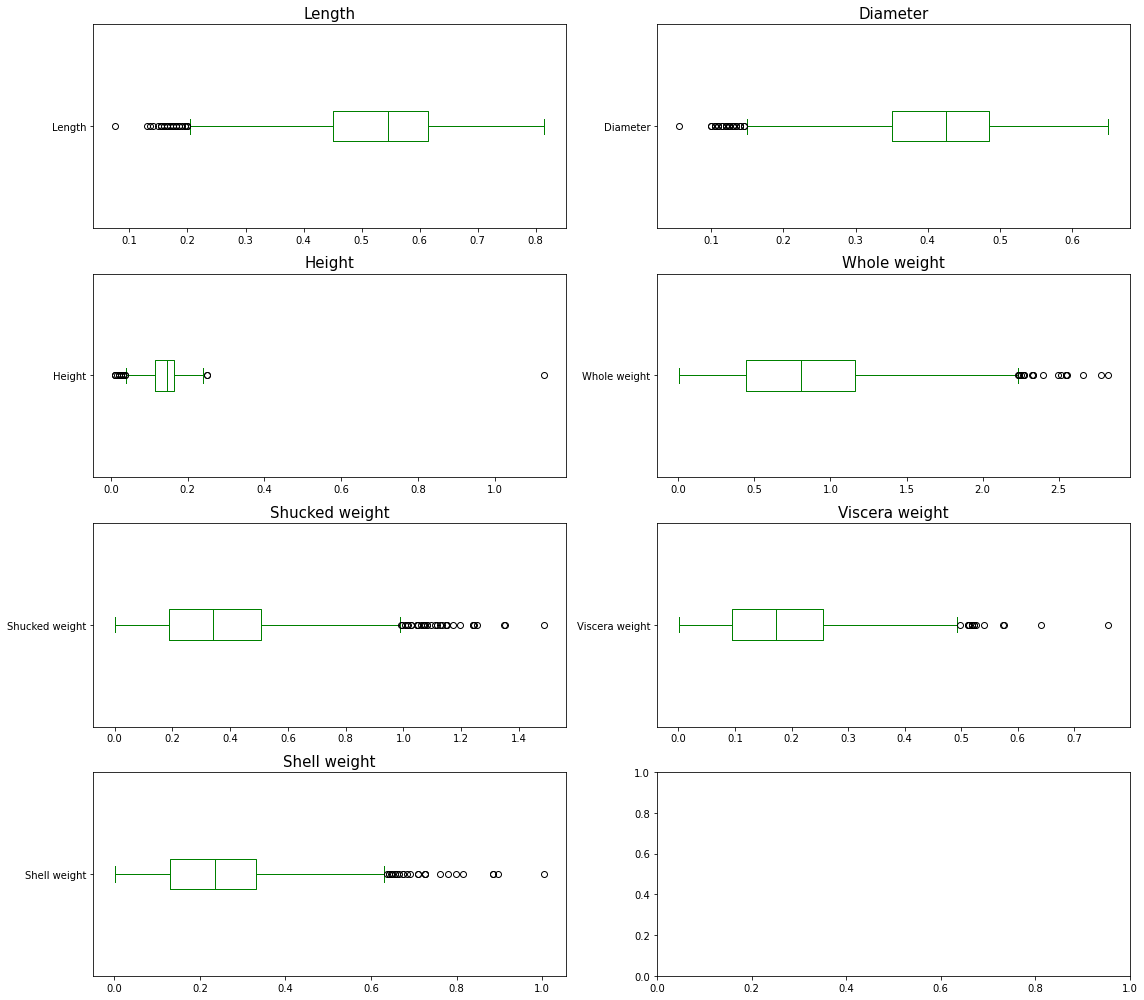

In [15]:
fig, axes = plt.subplots(4, 2, figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numeric_features):
    hist = train[c].plot(kind='box', ax=axes[i], title=c, color='green', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

We can see that every numerical feature has an outlier. The number of outliers is the possibility that the data is not normally distributed.

We will not remove this outlier because we fear that we will lose information in the dataset.

For numerical features, in the next process we will scale continuous features with `MinMaxScaler` 

### Target Distribution

Next, we will look at the target distribution (`Age` column) 

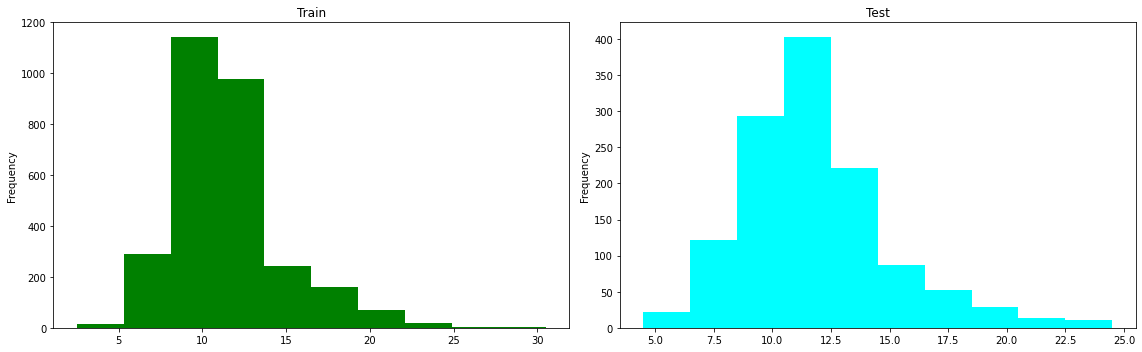

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))

train[target].plot.hist(color='green', ax=axes[0])
axes[0].set(title='Train')

test[target].plot.hist(color='cyan', ax=axes[1])
axes[1].set(title='Test')

plt.tight_layout()
plt.show()

In the graph above, we can see that the target is not normally distributed and the possible value distribution is on the left of the curve, which means that the skewness is positive.

To make sure, we check if there is an outlier in the target. 

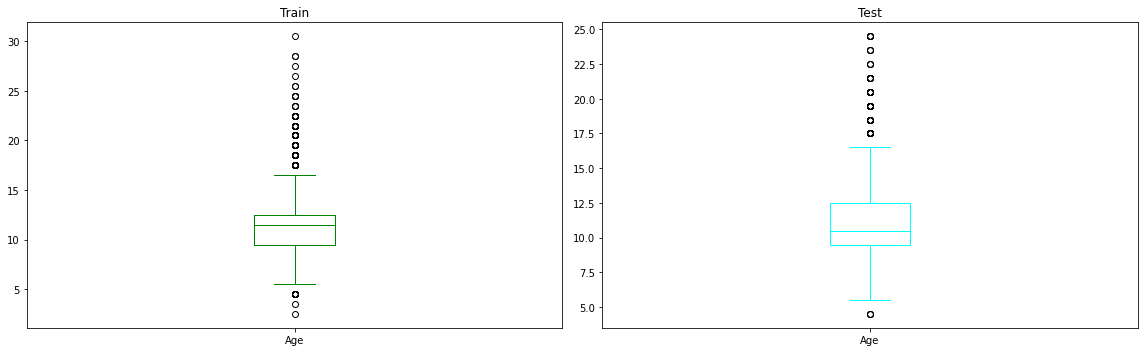

In [17]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))

train[target].plot(kind='box', color='green', ax=axes[0])
axes[0].set(title='Train')

test[target].plot(kind='box', color='cyan', ax=axes[1])
axes[1].set(title='Test')

plt.tight_layout()
plt.show()

The existence of outliers that cause the target is not maximally distributed. We also will not remove these outliers for fear that we will lose information on the dataset.

We will perform transformations on the target in the hope of improving the performance of the model. 

### Pearson correlation

We will see how the correlation between features, especially numerical features with target.

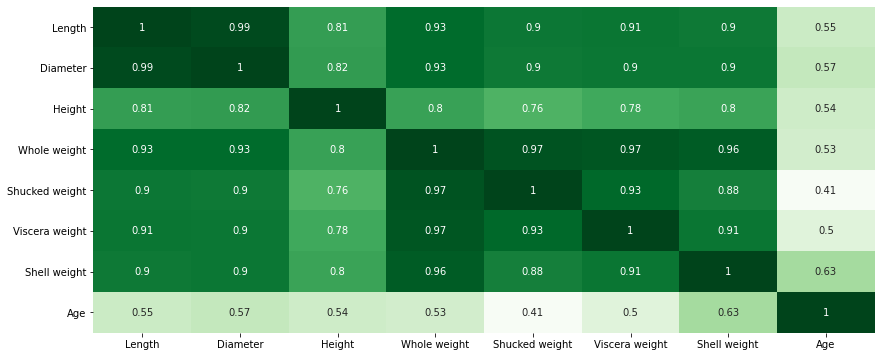

In [18]:
plt.figure(figsize=(14, 6))
sns.heatmap(train.corr(method='pearson'), annot=True, cbar=False, cmap='Greens')

plt.show()

Each numerical feature has a linear correlation with the target, only in the range of 0.5 which means the linearity to the target is neither too strong nor weak (moderate).

Furthermore, we can see it in the following scatter graph 

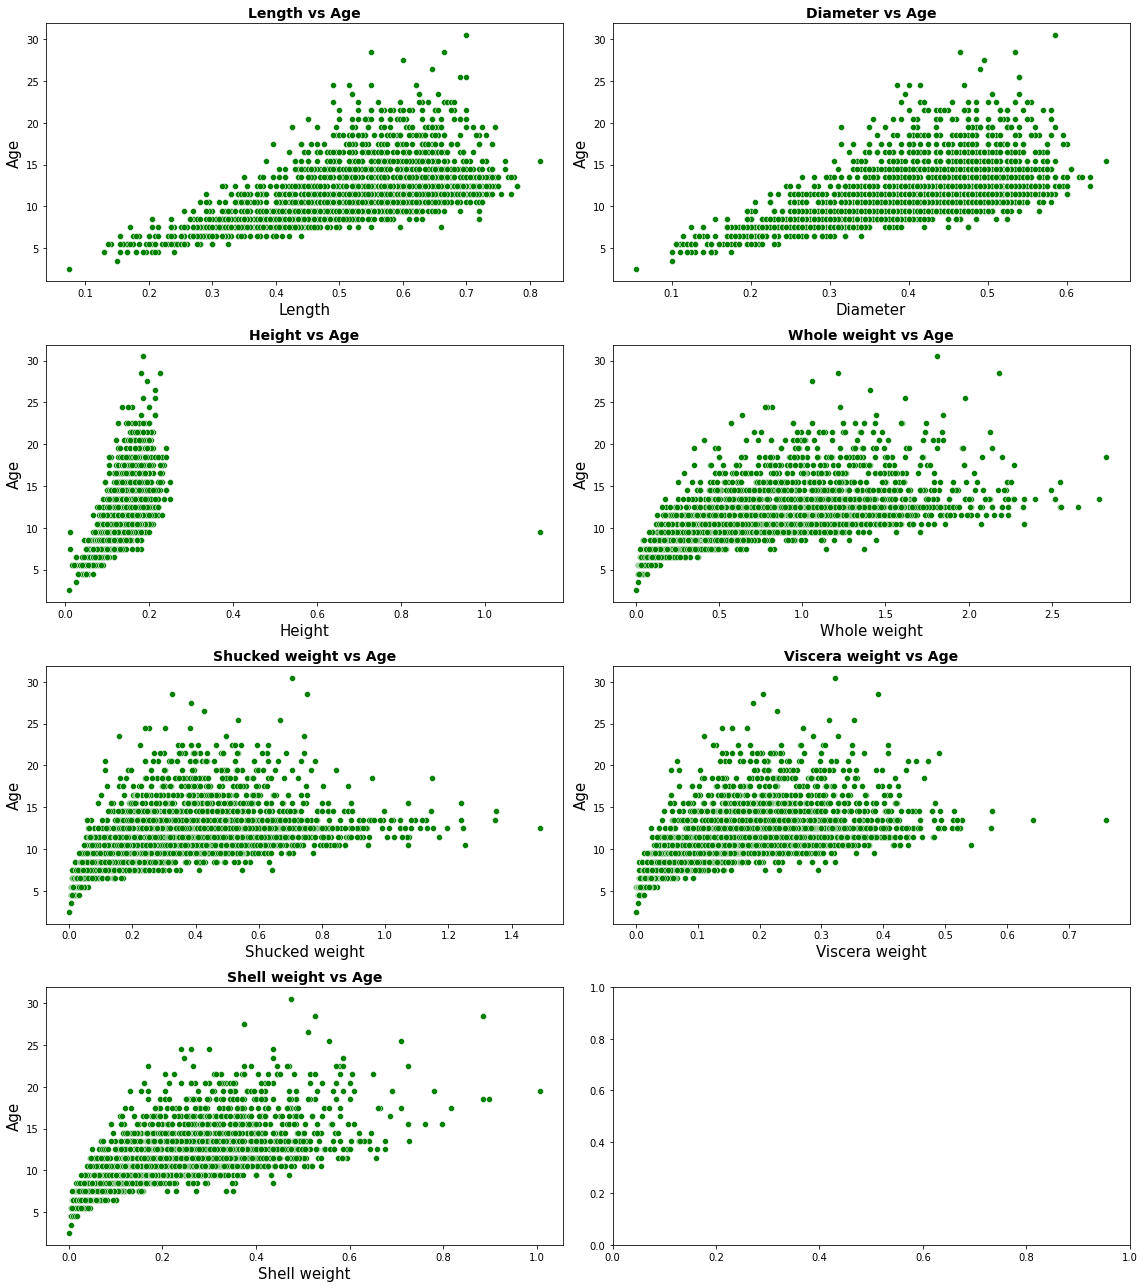

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = np.ravel(axes)

for i, c in enumerate(numeric_features):
    _ = sns.scatterplot(x=train[c], y=train[target], ax=axes[i], color='green')
    axes[i].set_title(f"{c} vs Age", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(c, fontsize=15)
    axes[i].set_ylabel('Age', fontsize=15)
    
plt.tight_layout()
plt.show()

We can see that there is a linear relationship between the numerical features and the target, even if calculated by Pearson correlation is moderate.

## Preprocessing  and Feature Engineering

We first perform categorical feature engineering. We will use one-hot-encoding to encode the categorical features.

In [20]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [21]:
train.shape, test.shape

((2923, 11), (1254, 11))

We can see that there is an increase in the column in the dataset to 11. Let's look at the train set for the result.

In [22]:
train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,Sex_F,Sex_I,Sex_M
2830,0.525,0.430,0.135,0.8435,0.4325,0.1800,0.1815,10.5,1,0,0
925,0.430,0.325,0.100,0.3645,0.1575,0.0825,0.1050,8.5,0,1,0
3845,0.455,0.350,0.105,0.4160,0.1625,0.0970,0.1450,12.5,0,0,1
547,0.205,0.155,0.045,0.0425,0.0170,0.0055,0.0155,8.5,0,0,1
2259,0.590,0.465,0.160,1.1005,0.5060,0.2525,0.2950,14.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.1450,10.5,1,0,0
466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000,13.5,1,0,0
3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.1880,12.5,0,0,1
3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.2350,10.5,0,0,1


Next, we separate features with the target.

In [23]:
X_train = train.drop('Age', axis=1)
y_train = train["Age"]

X_test = test.drop('Age', axis=1)
y_test = test["Age"]

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2923, 10), (2923,), (1254, 10), (1254,))

## Modelling

We will first scale the features with `MinMaxScaler`. We will also use a `pipeline` to simplify the process. We will also use `GridSearchCV` to help estimate the best parameters, where cv equals 5.

For the process of using transformed targets, we will use the `TransformedTargetRegressor`.

We will transform the target with `np.sqrt`.

### Linear regression

We start with a linear regression model. For linear regression, the parameter we estimate is `fit_intercept`.

#### Linear regression without target transformation

In [25]:
pipe_lr = make_pipeline(MinMaxScaler(), LinearRegression())

params_lr = {'linearregression__fit_intercept':['True', 'False']}

grid_lr = GridSearchCV(pipe_lr, param_grid=params_lr, cv=5)

In [26]:
grid_lr.fit(X_train, y_train)

grid_lr.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression(fit_intercept='True'))])

In [27]:
print('Set training score: {:.3f}'.format(grid_lr.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(grid_lr.score(X_test, y_test)))

Set training score: 0.540
Set test score: 0.529


In [28]:
y_pred = grid_lr.predict(X_test)

mse_lr = round(mean_squared_error(y_test, y_pred),3)

print('Mean square error for linear regression without target transformation is:', mse_lr)

Mean square error for linear regression without target transformation is: 4.786


#### Linear regression with target transformation

In [29]:
pipe_lr = make_pipeline(MinMaxScaler(), LinearRegression(fit_intercept=True))

regr_trans_lr =  TransformedTargetRegressor(regressor=pipe_lr, 
                                            func=np.sqrt, inverse_func=np.square)

In [30]:
regr_trans_lr.fit(X_train, y_train)

y_pred = regr_trans_lr.predict(X_test)

In [31]:
print('Set training score: {:.3f}'.format(regr_trans_lr.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(regr_trans_lr.score(X_test, y_test)))

Set training score: 0.529
Set test score: 0.532


In [32]:
mse_lr_tt = round(mean_squared_error(y_test, y_pred),3)

print('Mean square error for linear regression with target transformation is:', mse_lr_tt)

Mean square error for linear regression with target transformation is: 4.748


###  Nearest Neighbors Regression

The parameter we will estimate is `n_neighbors`

#### Nearest Neighbors without target transformation

In [33]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor())

params_knn = {'kneighborsregressor__n_neighbors':list(range(1, 51))}

grid_knn = GridSearchCV(pipe_knn, param_grid=params_knn, cv=5)

In [34]:
grid_knn.fit(X_train, y_train)

grid_knn.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=16))])

In [35]:
print('Set train score: {:.3f}'.format(grid_knn.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(grid_knn.score(X_test, y_test)))

Set train score: 0.585
Set test score: 0.529


In [36]:
y_pred = grid_knn.predict(X_test)

mse_knn = round(mean_squared_error(y_test, y_pred),3)

print('Mean square error for KNN regression without target transformation is:', mse_knn)

Mean square error for KNN regression without target transformation is: 4.784


#### Nearest Neighbors with target transformation

In [37]:
pipe_knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=16))

regr_trans_knn =  TransformedTargetRegressor(regressor=pipe_knn, 
                                             func=np.sqrt, inverse_func=np.square)

In [38]:
regr_trans_knn.fit(X_train, y_train)

y_pred = regr_trans_knn.predict(X_test)

In [39]:
print('Set train score: {:.3f}'.format(regr_trans_knn.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(regr_trans_knn.score(X_test, y_test)))

Set train score: 0.578
Set test score: 0.526


In [40]:
mse_knn_tt = round(mean_squared_error(y_test, y_pred),3)
print('Mean square error for KNN regression with target transformation is:', mse_knn_tt)

Mean square error for KNN regression with target transformation is: 4.811


### Decision Tree Regression

The parameters we will set for the Decision Tree regression are `max_depth` and `max_features` 

#### Decision Tree without target transformation

In [41]:
dt = DecisionTreeRegressor(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(3455, 25)

In [42]:
params_dt = {'max_depth': range(1, dt.tree_.max_depth+1, 2),
            'max_features': range(1, len(dt.feature_importances_)+1)}

In [43]:
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42),
                        param_grid = params_dt)

grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 26, 2),
                         'max_features': range(1, 11)})

In [44]:
grid_tree.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features=8, random_state=42)

In [45]:
print('Set train score: {:.3f}'.format(grid_tree.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(grid_tree.score(X_test, y_test)))

Set train score: 0.551
Set test score: 0.457


In [46]:
y_pred = grid_tree.predict(X_test)

mse_dt = round(mean_squared_error(y_test, y_pred), 3)

print('Mean square error for Decision Tree regression without target transformation is:', 
      mse_dt)

Mean square error for Decision Tree regression without target transformation is: 5.516


#### Decision Tree with target transformation

In [47]:
tree = DecisionTreeRegressor(random_state=42,
                            max_depth=5,
                            max_features=8)

regr_trans_tree =  TransformedTargetRegressor(regressor=tree,
                                           func=np.sqrt,
                                           inverse_func=np.square)

regr_trans_tree.fit(X_train, y_train)

y_pred = regr_trans_tree.predict(X_test)

In [48]:
print('Set train score: {:.3f}'.format(regr_trans_tree.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(regr_trans_tree.score(X_test, y_test)))

Set train score: 0.546
Set test score: 0.462


In [49]:
mse_dt_tt = round(mean_squared_error(y_test, y_pred),3)

print('Mean square error for Decision Tree regression with target transformation is:', 
      mse_dt_tt)

Mean square error for Decision Tree regression with target transformation is: 5.463


### Support Vector Regression

The parameters we will be setting are `C` and `gamma`.

#### Support Vector Regression without target transformation

In [50]:
pipe_svr = make_pipeline(MinMaxScaler(), SVR())

params_svr = {'svr__gamma':['scale', 'auto'],
            'svr__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_svr = GridSearchCV(pipe_svr, param_grid=params_svr, cv=5)

In [51]:
grid_svr.fit(X_train, y_train)

grid_svr.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svr', SVR(C=100))])

In [52]:
print('Set train score: {:.3f}'.format(grid_svr.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(grid_svr.score(X_test, y_test)))

Set train score: 0.588
Set test score: 0.554


In [53]:
y_pred = grid_svr.predict(X_test)

mse_svr = round(mean_squared_error(y_test, y_pred), 3)

print('Mean square error for SVR without target transformation is:', mse_svr)

Mean square error for SVR without target transformation is: 4.526


#### Support Vector Regression with target transformation

In [54]:
pipe_svr = make_pipeline(MinMaxScaler(), SVR(C=100))

regr_trans_svr =  TransformedTargetRegressor(regressor=pipe_svr,
                                           func=np.sqrt,
                                           inverse_func=np.square)

regr_trans_svr.fit(X_train, y_train)

y_pred = regr_trans_svr.predict(X_test)

In [55]:
print('Set train score: {:.3f}'.format(regr_trans_svr.score(X_train, y_train)))
print('Set test score: {:.3f}'.format(regr_trans_svr.score(X_test, y_test)))

Set train score: 0.597
Set test score: 0.551


In [56]:
mse_svr_tt = round(mean_squared_error(y_test, y_pred),3)

print('Mean square error for SVR with target transformation is:', mse_svr_tt)

Mean square error for SVR with target transformation is: 4.557


Calculation of all the models above, we summarize in the following table 

In [57]:
value = {'Train Score':[round(grid_lr.score(X_train, y_train), 3),
                        round(regr_trans_lr.score(X_train, y_train), 3),
                        round(grid_knn.score(X_train, y_train), 3),
                        round(regr_trans_knn.score(X_train, y_train), 3),
                        round(grid_tree.score(X_train, y_train), 3),
                        round(regr_trans_tree.score(X_train, y_train), 3),
                        round(grid_svr.score(X_train, y_train), 3),
                        round(regr_trans_svr.score(X_train, y_train), 3)],
        'Test Score': [round(grid_lr.score(X_test, y_test), 3),
                        round(regr_trans_lr.score(X_test, y_test), 3),
                        round(grid_knn.score(X_test, y_test), 3),
                        round(regr_trans_knn.score(X_test, y_test), 3),
                        round(grid_tree.score(X_test, y_test), 3),
                        round(regr_trans_tree.score(X_test, y_test), 3),
                        round(grid_svr.score(X_test, y_test), 3),
                        round(regr_trans_svr.score(X_test, y_test), 3)],
        'MSE':[mse_lr, mse_lr_tt, mse_knn, mse_knn_tt, mse_dt, 
               mse_dt_tt, mse_svr, mse_svr_tt]
        }

index = ['Linear regression without target transformation',
        'Linear regression with target transformation',
        'KNN regression without target transformation',
        'KNN regression with target transformation',
        'Decision Tree Regression without target transformation',
        'Decision Tree Regression with target transformation',
        'SVR without target transformation',
        'SVR with target transformation']

pd.DataFrame(value, index=index)

,Train Score,Test Score,MSE
Linear regression without target transformation,0.540,0.529,4.786
Linear regression with target transformation,0.529,0.532,4.748
KNN regression without target transformation,0.585,0.529,4.784
KNN regression with target transformation,0.578,0.526,4.811
Decision Tree Regression without target transformation,0.551,0.457,5.516
Decision Tree Regression with target transformation,0.546,0.462,5.463
SVR without target transformation,0.588,0.554,4.526
SVR with target transformation,0.597,0.551,4.557


## Discussion

In linear regression, the target transformation is able to reduce the mean square error value. It is even able to improve the performance of the model. However, the target transformation in linear regression actually reduces the complexity of the model. This can be seen when using linear regression with a transformed target, the model actually experiences underfitting.

In KNN regression, the model has complexity to the data (overfitting) either without or with the target transformation. Transforming the target in this model actually reduces the model's performance and increases the mean square error value. Although the target transformation is able to slightly cause the model to be more general in the use of the same model.

The effect of the target transformation is quite good shown in the Decision Tree regression. Target transformation is able to reduce the mean square error value. Although it reduces the complexity of the model, the target transformation is able to make this model more general to the data.

Target transformation has an unfavorable effect on the SVR model. The target transformation actually increases the mean square error value and also reduces the performance of the model. The target transformation in this model also increases the complexity of the model, so that the model becomes less general to the data. 

## Conclusion

From all the calculations above, it can be concluded:
1. Target transformation has a different effect on each model.
2. Of the four models used above, the model that can be used as a predictor is linear regression without model transformation. Because the model is the most generalized to the data, even though it is not the one with the smallest mean square error. 

## Further Analysis 

In the future, it is necessary to analyze using other regression models as well as other target transformation methods, such as `boxcox`, `np.log1p`, `np.log` and so on. 

## References

1. http://archive.ics.uci.edu/ml/datasets/Abalone
2. https://thomassoseco.blogspot.com/2019/02/skewness-dan-kurtosis.html
3. https://www.kaggle.com/ashokkumarpalivela/abalone-age-prediction-end-to-end-project
4. https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html
5. https://www.merdeka.com/jateng/regresi-adalah-metode-untuk-menentukan-sebab-akibat-kenali-jenis-dan-contohnya-kln.html?page=2